In [2]:
#Read CSV file using pandas

def get_df_from_csv(file_name):
    import pandas as pd
    df = pd.read_csv(file_name)
    return df

In [3]:
#getting data frame column as text

def get_text_from_dataframe_column(df, column_name):
    lst = []
    for str in df[column_name]:
        lst.append(str)
    text = ''.join(lst)
    return text;

In [4]:
# code to compute ngrams from text

def Compute_ngrams(text, n):
    import nltk
    import collections
    from nltk import word_tokenize
    from nltk.util import ngrams
    from collections import Counter, defaultdict

    #"I need to write a program in NLTK that breaks a corpus (a large collection of txt files) into unigrams, 
    #bigrams, trigrams, fourgrams and fivegrams. I need to write a program in NLTK that breaks a corpus"
    token = nltk.word_tokenize(text)
    unigrams = ngrams(token,1)
    bigrams = ngrams(token,2)
    trigrams = ngrams(token,3)
    fourgrams = ngrams(token,4)
    fivegrams = ngrams(token,5)
    
    switcher = {
        1: unigrams,
        2: bigrams,
        3: trigrams,
        4: fourgrams,
        5: fivegrams,
    }
    return switcher.get(n, "nothing")

In [5]:
#print a given n-gram object

def print_ngrams(ngram):
     #Counter(unigrams)
    freqword = defaultdict(list)
    for word, freq in Counter(ngram).items():
        freqword[freq].append(word)

    # print in order of occurrence (with sorted list of words)
    for freq in sorted(freqword, reverse=True):
        print('count {}: {}'.format(freq, sorted(freqword[freq])))
    return;

In [6]:
#Save and print a word cloud for given text
def print_and_save_a_wordcloud(text, file_name):
    from os import path
    import os
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    wordcloud = WordCloud(background_color="white", stopwords=[], width=1280, height=960).generate(text)

    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('outputs/'+file_name+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    return;

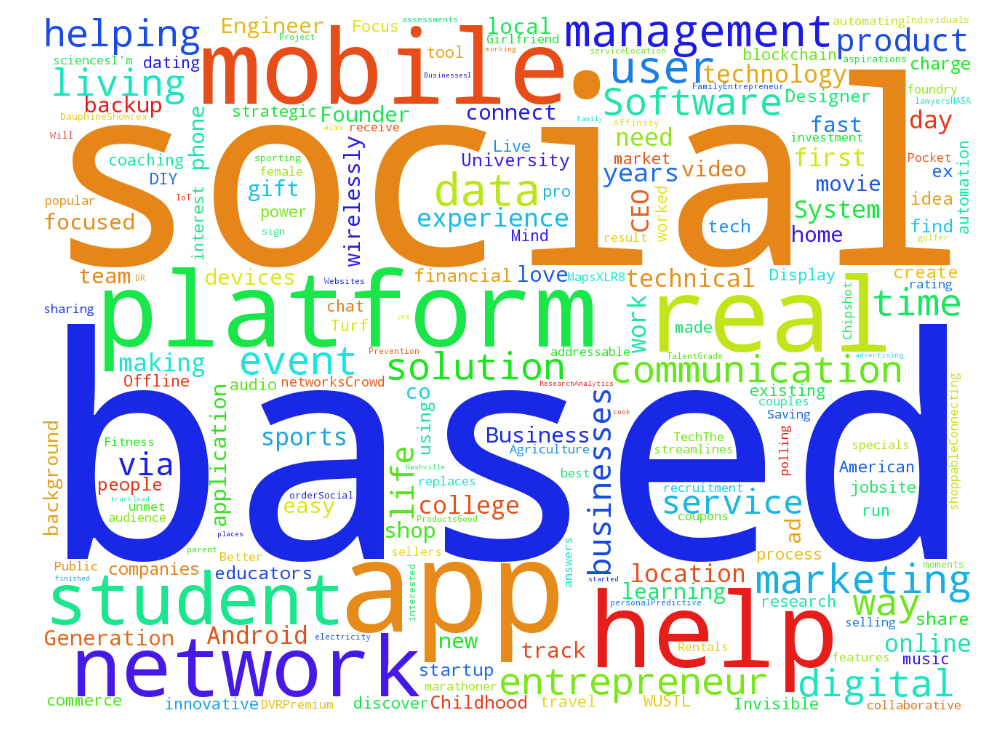

In [7]:
#Main function handling all the high level calls 

file_name = 'cap_innov_data_sp16.csv'
column_name = 'Brief Description'

df = get_df_from_csv(file_name)
#print (df)

text = get_text_from_dataframe_column(df, column_name)
#print (text)

unigram = Compute_ngrams(text, 1)
bigram = Compute_ngrams(text, 2)
#print_ngrams(bigram)

print_and_save_a_wordcloud(text, 'wordcloud_onegram')